# T1 - country vital dynamics

The purpose of this tutorial is to show you to use `pyvd` to create vital dynamics trajectories (i.e., birth/mortality rates by year) at the country level.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvd
print(f"pyvd version: {pyvd.__version__}")

pyvd version: 0.4.5


`pyvd` includes population data from UN's WPP. Here we use India's ISO-3 code "IND" to get the popolation data:

In [2]:
pop_input = pyvd.make_pop_dat('IND') # 22 x 31 matrix

Currently, there are some hard baked constants:

In [3]:
# year vector
year_vec = pop_input[0, :] - pyvd.constants.BASE_YEAR
# first year (0)
year_init = pyvd.constants.BASE_YEAR - pyvd.constants.BASE_YEAR
# array of ages used for the mortality and population
mort_age_vec = np.array(pyvd.constants.MORT_XVAL)

We make some minor adjustments and figure out the initial population for the trajectories we will compute (i.e., birth/mortality rates as a function of time)

In [4]:
# population matrix (add small value to avoid zeros): age x year
pop_mat = pop_input[1:, :] + 0.1

Shape of the pop_input matrix (includes year): (21, 31)
Number of years 31


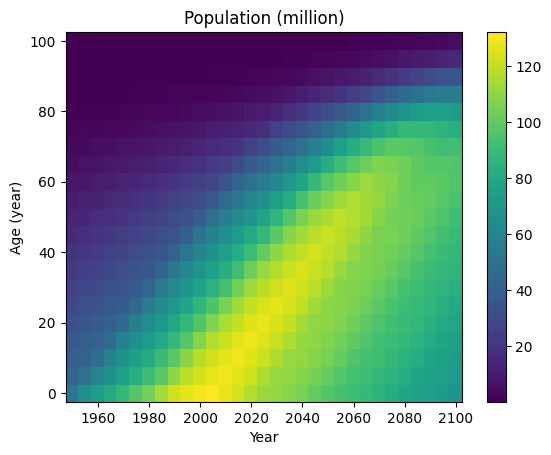

In [5]:
plt.pcolor(pyvd.constants.BASE_YEAR + year_vec, mort_age_vec[::2]/365, pop_mat / 1e6)
plt.colorbar()
plt.xlabel('Year')
plt.ylabel('Age (year)')
plt.title("Population (million)")
print(f"Shape of the pop_input matrix (includes year): {pop_mat.shape}")
print(f"Number of years {len(year_vec)}")

use `pyvd` to construct the vital dynamics (i.e., birth and age-based mortality rates)

In [6]:
# calculate vital dynamics
vd = pyvd.demog_vd_calc(year_vec, year_init, pop_mat)
print(f"Resulting fields: {vd._fields}")

Resulting fields: ('mort_year', 'mort_mat', 'birth_rate', 'br_mult_x', 'br_mult_y')


The formatting of the mortality matrix specifies bin edges and is monitonically increasing by age.

mort_age_vec is monitonically increasing: True


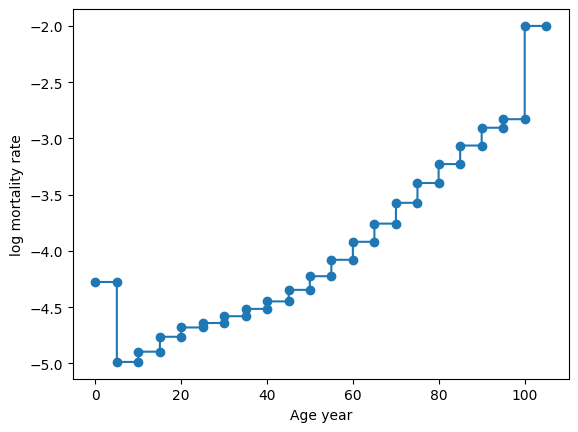

In [7]:
plt.plot(mort_age_vec/ 365, np.log10(vd.mort_mat[:,1]), '-o')
plt.xlabel('Age year')
plt.ylabel('log mortality rate')
print('mort_age_vec is monitonically increasing:', np.all(np.diff(mort_age_vec) > 0))

plot the mortality rates by age and year

Number of age bins for mortality: 21
Number of years: 59


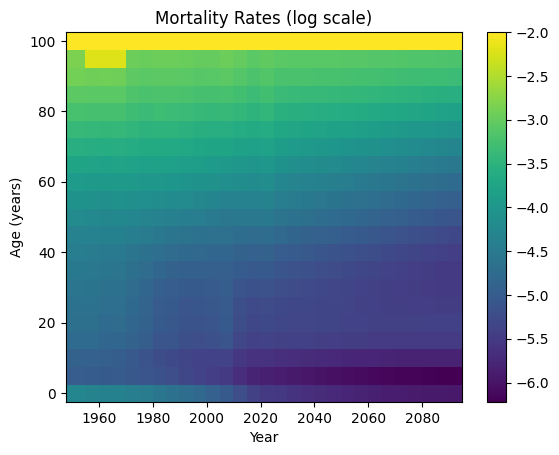

In [8]:
plt.pcolor(pyvd.constants.BASE_YEAR+ np.array(vd.mort_year), mort_age_vec[::2]/ 365, np.log10(vd.mort_mat[::2,:]))
plt.colorbar()
plt.xlabel('Year')
plt.ylabel('Age (years)')
plt.title("Mortality Rates (log scale)")
print(f"Number of age bins for mortality: {len(mort_age_vec)//2}")
print(f"Number of years: {len(vd.mort_year)}")